In [95]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, OrdinalEncoder
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score, davies_bouldin_score
from nltk.stem.snowball import SnowballStemmer
from nltk.stem.wordnet import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
import swifter
import random
from nltk.corpus import stopwords
from sklearn.preprocessing import StandardScaler
from sklearn.metrics.pairwise import cosine_similarity
from scipy import sparse
from sklearn.model_selection import train_test_split

import re
from tqdm import tqdm
import torch
from transformers import BertTokenizer, BertModel
from sklearn.metrics.pairwise import cosine_similarity
import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

In [96]:
albums=pd.read_csv('albums.csv', delimiter='\t') 
artists=pd.read_csv('artists.csv', delimiter='\t')
releases=pd.read_csv('releases.csv', delimiter='\t')
songs=pd.read_csv('songs.csv', delimiter='\t')
tracks=pd.read_csv('tracks.csv', delimiter='\t')

In [97]:
acoustic_features = pd.read_csv('acoustic_features.csv', delimiter='\t')
lyrics = pd.read_csv('lyrics.csv', delimiter='\t')

In [98]:
print(" The columns types are \n{}".format(albums.dtypes)) 
print("----------------------------")
print("The dimension of the data is {}".format(albums.shape))
print("----------------------------")
print("The count of missing values in each column is \n{}".format(albums.isnull().sum()))
print("----------------------------")
print("The count of duplicates in the data is \n{}".format(albums.duplicated().sum()))
print("------------- ---------------")
albums.head()

 The columns types are 
album_id        object
name            object
billboard       object
artists         object
popularity       int64
total_tracks     int64
album_type      object
image_url       object
dtype: object
----------------------------
The dimension of the data is (26519, 8)
----------------------------
The count of missing values in each column is 
album_id        0
name            0
billboard       0
artists         0
popularity      0
total_tracks    0
album_type      0
image_url       0
dtype: int64
----------------------------
The count of duplicates in the data is 
0
------------- ---------------


,album_id,name,billboard,artists,popularity,total_tracks,album_type,image_url
0,5n1GSzC1Reao29ScnpLYqp,Dying To Live,Dying To Live,{'46SHBwWsqBkxI7EeeBEQG7': 'Kodak Black'},83,16,album,https://i.scdn.co/image/db2133234d458f432ca207...
1,6UYZEYjpN1DYRW0kqFy9ZE,Championships,Championships,{'20sxb77xiYeusSH8cVdatc': 'Meek Mill'},85,19,album,https://i.scdn.co/image/77eb7c17cafe5503c58661...
2,7uVimUILdzSZG4KKKWToq0,Christmas (Deluxe Special Edition),Christmas,{'1GxkXlMwML1oSg5eLPiAz3': 'Michael Bublé'},60,20,album,https://i.scdn.co/image/2d6ee8d4fb5a45abf35cd3...
3,35s58BRTGAEWztPo9WqCIs,Spider-Man: Into the Spider-Verse (Soundtrack ...,Spider-Man: Into The Spider-Verse,{'0LyfQWJT6nXafLPZqxe9Of': 'Various Artists'},92,13,compilation,https://i.scdn.co/image/3aa37254a41cf96e815725...
4,41GuZcammIkupMPKH2OJ6I,ASTROWORLD,ASTROWORLD,{'0Y5tJX1MQlPlqiwlOH1tJY': 'Travis Scott'},91,17,album,https://i.scdn.co/image/cdca7dc20c778ada42fb18...


In [99]:
print(" The columns types are \n{}".format(artists.dtypes)) 
print("----------------------------")
print("The dimension of the data is {}".format(artists.shape))
print("----------------------------")
print("The count of missing values in each column is \n{}".format(artists.isnull().sum()))
print("----------------------------")
print("The count of duplicates in the data is \n{}".format(artists.duplicated().sum()))
print("------------- ---------------")
artists.head()

 The columns types are 
artist_id       object
name            object
followers      float64
popularity       int64
artist_type     object
main_genre      object
genres          object
image_url       object
dtype: object
----------------------------
The dimension of the data is (11518, 8)
----------------------------
The count of missing values in each column is 
artist_id      0
name           0
followers      2
popularity     0
artist_type    0
main_genre     0
genres         0
image_url      0
dtype: int64
----------------------------
The count of duplicates in the data is 
0
------------- ---------------


,artist_id,name,followers,popularity,artist_type,main_genre,genres,image_url
0,66CXWjxzNUsdJxJ2JdwvnR,Ariana Grande,34554242.0,96,singer,dance pop,"['dance pop', 'pop', 'post-teen pop']",https://i.scdn.co/image/b1dfbe843b0b9f54ab2e58...
1,26VFTg2z8YR0cCuwLzESi2,Halsey,7368242.0,90,singer,dance pop,"['dance pop', 'electropop', 'etherpop', 'indie...",https://i.scdn.co/image/22a5f3d8c42bc7cb55215e...
2,0Y5tJX1MQlPlqiwlOH1tJY,Travis Scott,6313709.0,94,rapper,pop,"['pop', 'pop rap', 'rap']",https://i.scdn.co/image/dc5eba5e032c2e5bc4d42c...
3,246dkjvS1zLTtiykXe5h60,Post Malone,16737002.0,96,rapper,dfw rap,"['dfw rap', 'pop', 'rap']",https://i.scdn.co/image/f9d8b742b66609f12da023...
4,1zNqQNIdeOUZHb8zbZRFMX,Swae Lee,483032.0,89,singer,trap music,['trap music'],https://i.scdn.co/image/a177469870b41f7e17e3b5...


In [100]:
print(" The columns types are \n{}".format(releases.dtypes)) 
print("----------------------------")
print("The dimension of the data is {}".format(releases.shape))
print("----------------------------")
print("The count of missing values in each column is \n{}".format(releases.isnull().sum()))
print("----------------------------")
print("The count of duplicates in the data is \n{}".format(releases.duplicated().sum()))
print("------------- ---------------")
releases.head()

 The columns types are 
artist_id                 object
album_id                  object
release_date              object
release_date_precision    object
dtype: object
----------------------------
The dimension of the data is (26522, 4)
----------------------------
The count of missing values in each column is 
artist_id                 0
album_id                  0
release_date              0
release_date_precision    0
dtype: int64
----------------------------
The count of duplicates in the data is 
0
------------- ---------------


,artist_id,album_id,release_date,release_date_precision
0,46SHBwWsqBkxI7EeeBEQG7,5n1GSzC1Reao29ScnpLYqp,2018-12-14,day
1,20sxb77xiYeusSH8cVdatc,6UYZEYjpN1DYRW0kqFy9ZE,2018-11-30,day
2,1GxkXlMwML1oSg5eLPiAz3,7uVimUILdzSZG4KKKWToq0,2012-11-09,day
3,0LyfQWJT6nXafLPZqxe9Of,35s58BRTGAEWztPo9WqCIs,2018-12-14,day
4,0Y5tJX1MQlPlqiwlOH1tJY,41GuZcammIkupMPKH2OJ6I,2018-08-03,day


In [101]:
print(" The columns types are \n{}".format(songs.dtypes)) 
print("----------------------------")
print("The dimension of the data is {}".format(songs.shape))
print("----------------------------")
print("The count of missing values in each column is \n{}".format(songs.isnull().sum()))
print("----------------------------")
print("The count of duplicates in the data is \n{}".format(songs.duplicated().sum()))
print("------------- ---------------")
songs.head()

 The columns types are 
song_id       object
song_name     object
billboard     object
artists       object
popularity     int64
explicit        bool
song_type     object
dtype: object
----------------------------
The dimension of the data is (20405, 7)
----------------------------
The count of missing values in each column is 
song_id       0
song_name     0
billboard     0
artists       0
popularity    0
explicit      0
song_type     0
dtype: int64
----------------------------
The count of duplicates in the data is 
0
------------- ---------------


,song_id,song_name,billboard,artists,popularity,explicit,song_type
0,3e9HZxeyfWwjeyPAMmWSSQ,"thank u, next","('Thank U, Next', 'Ariana Grande')",{'66CXWjxzNUsdJxJ2JdwvnR': 'Ariana Grande'},86,True,Solo
1,5p7ujcrUXASCNwRaWNHR1C,Without Me,"('Without Me', 'Halsey')",{'26VFTg2z8YR0cCuwLzESi2': 'Halsey'},87,True,Solo
2,2xLMifQCjDGFmkHkpNLD9h,SICKO MODE,"('Sicko Mode', 'Travis Scott')",{'0Y5tJX1MQlPlqiwlOH1tJY': 'Travis Scott'},85,True,Solo
3,3KkXRkHbMCARz0aVfEt68P,Sunflower - Spider-Man: Into the Spider-Verse,('Sunflower (Spider-Man: Into The Spider-Verse...,"{'246dkjvS1zLTtiykXe5h60': 'Post Malone', '1zN...",92,False,Collaboration
4,1rqqCSm0Qe4I9rUvWncaom,High Hopes,"('High Hopes', 'Panic! At The Disco')",{'20JZFwl6HVl6yg8a4H3ZqK': 'Panic! At The Disco'},86,False,Solo


In [102]:
print(" The columns types are \n{}".format(tracks.dtypes)) 
print("----------------------------")
print("The dimension of the data is {}".format(tracks.shape))
print("----------------------------")
print("The count of missing values in each column is \n{}".format(tracks.isnull().sum()))
print("----------------------------")
print("The count of duplicates in the data is \n{}".format(tracks.duplicated().sum()))
print("------------- ---------------")
tracks.head()

 The columns types are 
song_id                   object
album_id                  object
track_number               int64
release_date              object
release_date_precision    object
dtype: object
----------------------------
The dimension of the data is (20405, 5)
----------------------------
The count of missing values in each column is 
song_id                   0
album_id                  0
track_number              0
release_date              0
release_date_precision    0
dtype: int64
----------------------------
The count of duplicates in the data is 
0
------------- ---------------


,song_id,album_id,track_number,release_date,release_date_precision
0,3e9HZxeyfWwjeyPAMmWSSQ,2fYhqwDWXjbpjaIJPEfKFw,11,2019-02-08,day
1,5p7ujcrUXASCNwRaWNHR1C,0zzrCTzvL4ZmR42xF46Afm,1,2018-10-04,day
2,2xLMifQCjDGFmkHkpNLD9h,41GuZcammIkupMPKH2OJ6I,3,2018-08-03,day
3,3KkXRkHbMCARz0aVfEt68P,35s58BRTGAEWztPo9WqCIs,2,2018-12-14,day
4,1rqqCSm0Qe4I9rUvWncaom,6ApYSpXF8GxZAgBTHDzYge,4,2018-06-22,day


In [103]:
song_features = acoustic_features.merge(lyrics, on = 'song_id')
song_features

,song_id,duration_ms,key,mode,time_signature,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,valence,tempo,lyrics
0,3e9HZxeyfWwjeyPAMmWSSQ,207320,1,1,4,0.22900,0.717,0.653,0.000000,0.1010,-5.634,0.0658,0.412,106.966,['[Verse 1]\nThought I\'d end up with Sean\nBu...
1,5p7ujcrUXASCNwRaWNHR1C,201661,6,1,4,0.29700,0.752,0.488,0.000009,0.0936,-7.050,0.0705,0.533,136.041,"[""[Verse 1]\nFound you when your heart was bro..."
2,2xLMifQCjDGFmkHkpNLD9h,312820,8,1,4,0.00513,0.834,0.730,0.000000,0.1240,-3.714,0.2220,0.446,155.008,"['[Part I]\n\n[Intro: Drake]\nAstro, yeah\nSun..."
3,3KkXRkHbMCARz0aVfEt68P,158040,2,1,4,0.55600,0.760,0.479,0.000000,0.0703,-5.574,0.0466,0.913,89.911,NaN
4,1rqqCSm0Qe4I9rUvWncaom,190947,5,1,4,0.19300,0.579,0.904,0.000000,0.0640,-2.729,0.0618,0.681,82.014,"[""[Intro]\nHigh, high hopes\n\n[Chorus]\nHad t..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20399,0yZsBLZVU2HTMlMqYvWevJ,133744,5,1,4,0.38700,0.453,0.647,0.000000,0.4510,-7.985,0.0277,0.728,71.357,['The Trade Winds\nMiscellaneous\nNew York\'s ...
20400,30342v7I9sUoNC0Djnu1mW,125293,1,1,4,0.64700,0.576,0.542,0.000000,0.1730,-8.371,0.0276,0.508,104.083,"[""There's nothing I can say\nThere's nothing I..."
20401,5rkgbGIOTBGlKTAawWb06X,139400,4,0,4,0.14400,0.300,0.743,0.000000,0.3850,-10.005,0.0393,0.952,154.180,['825 ALL NIGHT – PAROV STELAR\n824 BIG JET PL...
20402,2MVPsa4S4r7Ii5lMh85E03,131333,9,1,4,0.79100,0.488,0.830,0.000728,0.1550,-4.487,0.0402,0.950,181.869,NaN


In [104]:
df1 = song_features.merge(songs, on = 'song_id', suffixes=('', '_songs'))
len(df1)

20404

In [105]:
df2 = df1.merge(tracks, on = 'song_id', suffixes=('', '_tracks'))
len(df2)

20404

In [106]:
df3 = df2.merge(albums, on = 'album_id', suffixes=('', '_albums'))
len(df3)

11300

In [107]:
df4 = df3.merge(releases, on = 'album_id', suffixes=('', '_releases'))
len(df4)

11300

In [108]:
df5 = df4.merge(artists, on = 'artist_id', suffixes=('', '_artists'))
len(df5)

11296

In [109]:
df5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11296 entries, 0 to 11295
Data columns (total 42 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   song_id                          11296 non-null  object 
 1   duration_ms                      11296 non-null  int64  
 2   key                              11296 non-null  int64  
 3   mode                             11296 non-null  int64  
 4   time_signature                   11296 non-null  int64  
 5   acousticness                     11296 non-null  float64
 6   danceability                     11296 non-null  float64
 7   energy                           11296 non-null  float64
 8   instrumentalness                 11296 non-null  float64
 9   liveness                         11296 non-null  float64
 10  loudness                         11296 non-null  float64
 11  speechiness                      11296 non-null  float64
 12  valence           

In [110]:
# Set option to display all columns
pd.set_option('display.max_columns', None)
df5.sample(10)

,song_id,duration_ms,key,mode,time_signature,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,valence,tempo,lyrics,song_name,billboard,artists,popularity,explicit,song_type,album_id,track_number,release_date,release_date_precision,name,billboard_albums,artists_albums,popularity_albums,total_tracks,album_type,image_url,artist_id,release_date_releases,release_date_precision_releases,name_artists,followers,popularity_artists,artist_type,main_genre,genres,image_url_artists
3405,4cNbCWPJjLHP5ijow5LbVg,340040,10,0,4,0.70000,0.414,0.402,0.000000,0.3630,-8.911,0.0427,0.171,105.368,"[""[Verse 1:]\nAlone in a room\nIt's just me an...",Open My Heart,"('Open My Heart', 'Yolanda Adams')",{'47opbYEKDjXnRk9uLscp11': 'Yolanda Adams'},46,False,Solo,6i3sZ5fdBwlPD9b1LVRD6M,7,1999-09-10,day,Mountain High Valley Low (U.S. Version),Mountain High...Valley Low,{'47opbYEKDjXnRk9uLscp11': 'Yolanda Adams'},46,11,album,https://i.scdn.co/image/72485edfe539ea05d0c8cb...,47opbYEKDjXnRk9uLscp11,1999-09-10,day,Yolanda Adams,250169.0,54,singer,gospel,"['gospel', 'gospel r&b']",https://i.scdn.co/image/135b0569f138defcf034d8...
3287,6CBRI05fAHw76JqDk2IRkK,165133,7,1,4,0.27900,0.674,0.863,0.000000,0.1320,-3.539,0.0512,0.821,123.872,"[""Yo Keith, what up? This is DJ Kutmasta Kurt\...",I'm Just Talkin' About Tonight,"(""I'm Just Talkin' About Tonight"", 'Toby Keith')",{'2bA6fzP0lMAQ4kz6CF61w8': 'Toby Keith'},43,False,Solo,3UBjWaGRf6ppcvnJd9M9UC,1,2008-01-01,day,Toby Keith 35 Biggest Hits,35 Biggest Hits,{'2bA6fzP0lMAQ4kz6CF61w8': 'Toby Keith'},65,35,album,https://i.scdn.co/image/e862bd80ae63a059b54875...,2bA6fzP0lMAQ4kz6CF61w8,2008-01-01,day,Toby Keith,1111109.0,73,singer,contemporary country,"['contemporary country', 'country', 'country r...",https://i.scdn.co/image/f7fa421e319432a08c0f1a...
2180,3XREqhLzypw6NzrFg1RMsr,231440,9,1,4,0.10100,0.456,0.469,0.000065,0.3170,-7.688,0.0311,0.272,78.513,"[""[Verse 1]\nThat anchorman\nSays they're figh...",God Must Be Busy,"('God Must Be Busy', 'Brooks & Dunn')",{'0XKOBt59crntr7HQXXO8Yz': 'Brooks & Dunn'},30,False,Solo,17TAGHz2PNov3uOzx2lNrn,12,2007-10-02,day,Cowboy Town,Cowboy Town,{'0XKOBt59crntr7HQXXO8Yz': 'Brooks & Dunn'},51,15,album,https://i.scdn.co/image/5d3864d81134b085e0f90b...,0XKOBt59crntr7HQXXO8Yz,2007-10-02,day,Brooks & Dunn,1162791.0,74,duo,contemporary country,"['contemporary country', 'country', 'country r...",https://i.scdn.co/image/f690523f5ad43ede56b91c...
10941,2mACzgIlPBYdzAucENb7vX,249360,5,0,4,0.33400,0.480,0.889,0.000000,0.3920,-4.542,0.2300,0.887,189.163,"[""The Mabbot street entrance of nighttown, bef...",Love Sets You Free - Album Version (Edited),"('Love Sets You Free', 'Kelly Price & Friends')",{'49FeZO3eSrJs7oH7lYLU1r': 'Kelly Price'},39,False,Solo,44dQ8oYbTHfATtaR7CaAe8,16,2000-01-01,day,Mirror Mirror,Kelly,{'49FeZO3eSrJs7oH7lYLU1r': 'Kelly Price'},46,16,album,https://i.scdn.co/image/7fc9e6fb73e2803266fb1c...,49FeZO3eSrJs7oH7lYLU1r,2000-01-01,day,Kelly Price,470448.0,54,singer,deep pop r&b,"['deep pop r&b', 'hip pop', 'neo soul', 'new j...",https://i.scdn.co/image/b1eab3f6e306171d3c6ea9...
3651,2HmMklpgK8vGCpJmPpz1yG,188200,7,1,4,0.09860,0.723,0.674,0.000018,0.2790,-7.427,0.0297,0.610,124.900,"[""[Verse 1]\nBig orange ball, sinking in the w...",How Forever Feels,"('How Forever Feels', 'Kenny Chesney')",{'3grHWM9bx2E9vwJCdlRv9O': 'Kenny Chesney'},54,False,Solo,67qNNUSHekqSliS7Q1XZj6,2,1999-02-26,day,Everywhere We Go,Everywhere We Go,{'3grHWM9bx2E9vwJCdlRv9O': 'Kenny Chesney'},62,11,album,https://i.scdn.co/image/f0b1b3ed94f7b498e3c901...,3grHWM9bx2E9vwJCdlRv9O,1999-02-26,day,Kenny Chesney,2606819.0,78,singer,contemporary country,"['contemporary country', 'country', 'country r...",https://i.scdn.co/image/89cc7048d98957e99ba59a...
3564,6leiB1fEsTnVCuPiielde5,183733,5,1,4,0.37800,0.507,0.850,0.000000,0.0567,-5.679,0.0472,0.847,171.800,"[""[Verse 1]\nIt was Labor Day weekend I was se...",Something Like That,"('Something Like That', 'Tim McGraw')",{'6roFdX1y5BYSbp60OTJWM

In [111]:
#drop unecessary columns 
columns= ['image_url_artists','genres','image_url','album_id','song_id']
df5= df5.drop(columns=columns,axis=1)

In [112]:
df5.isnull().sum() 

duration_ms                          0
key                                  0
mode                                 0
time_signature                       0
acousticness                         0
danceability                         0
energy                               0
instrumentalness                     0
liveness                             0
loudness                             0
speechiness                          0
valence                              0
tempo                                0
lyrics                             256
song_name                            0
billboard                            0
artists                              0
popularity                           0
explicit                             0
song_type                            0
track_number                         0
release_date                         0
release_date_precision               0
name                                 0
billboard_albums                     0
artists_albums           

In [113]:
from sklearn.impute import SimpleImputer

In [114]:
df5.shape

(11296, 37)

In [115]:
df5=df5.dropna()
df5.shape

(11040, 37)

In [116]:
df5.isnull().sum()

duration_ms                        0
key                                0
mode                               0
time_signature                     0
acousticness                       0
danceability                       0
energy                             0
instrumentalness                   0
liveness                           0
loudness                           0
speechiness                        0
valence                            0
tempo                              0
lyrics                             0
song_name                          0
billboard                          0
artists                            0
popularity                         0
explicit                           0
song_type                          0
track_number                       0
release_date                       0
release_date_precision             0
name                               0
billboard_albums                   0
artists_albums                     0
popularity_albums                  0
t

In [117]:
numerical_data= df5.select_dtypes(include=['int64','float64'])
object_bool_data= df5.select_dtypes(include=['object','bool'])

,duration_ms,key,mode,time_signature,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,valence,tempo,popularity,track_number,popularity_albums,total_tracks,followers,popularity_artists
count,1.104000e+04,11040.000000,11040.000000,11040.000000,11040.000000,11040.000000,11040.000000,11040.000000,11040.000000,11040.000000,11040.000000,11040.000000,11040.000000,11040.000000,11040.000000,11040.000000,11040.000000,1.104000e+04,11040.000000
mean,2.385800e+05,5.192029,0.718931,3.955163,0.232321,0.602694,0.643306,0.024992,0.184800,-8.455945,0.069412,0.592809,120.549964,43.806341,5.169928,54.242210,14.357065,2.601577e+06,65.462228
std,6.525111e+04,3.568197,0.449541,0.266634,0.243825,0.147285,0.192811,0.111567,0.153505,3.569172,0.076789,0.235852,27.811213,18.586664,4.448202,16.919954,8.245851,5.769297e+06,17.116966
min,4.048000e+04,0.000000,0.000000,0.000000,0.000003,0.000000,0.022000,0.000000,0.013600,-27.010000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000e+00,0.000000
25%,1.995035e+05,2.000000,0.000000,4.000000,0.033275,0.507000,0.503000,0.000000,0.086800,-10.872750,0.031900,0.405000,99.683500,31.000000,2.000000,43.000000,10.000000,1.751400e+05,57.000000
50%,2.313535e+05,5.000000,1.000000,4.000000,0.137000,0.609000,0.663000,0.000007,0.126000,-7.982500,0.040750,0.612000,119.219500,45.000000,4.000000,56.000000,12.000000,6.771100e+05,68.000000
75%,2.670400e+05,8.000000,1.000000,4.000000,0.371000,0.705000,0.800000,0.000609,0.239250,-5.623750,0.064025,0.787000,136.486750,58.000000,7.000000,67.000000,16.000000,2.159060e+06,77.000000
max,1.561133e+06,11.000000,1.000000,5.000000,0.982000,0.988000,0.996000,0.962000,0.997000,-0.517000,0.950000,0.989000,231.028000,86.000000,69.000000,95.000000,127.000000,4.980672e+07,100.000000


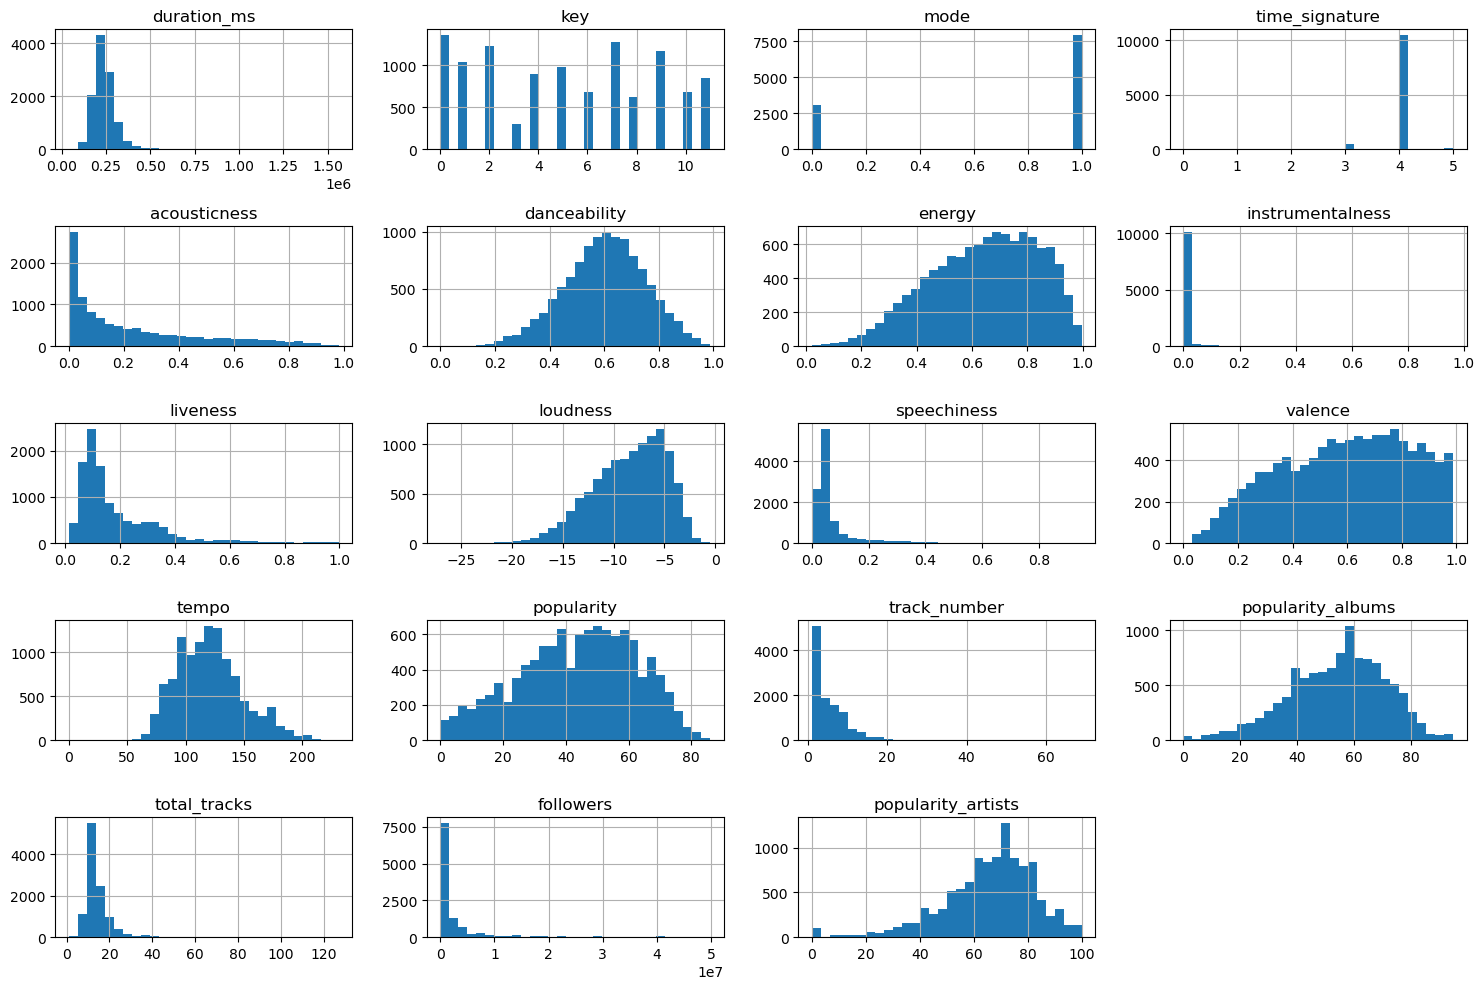

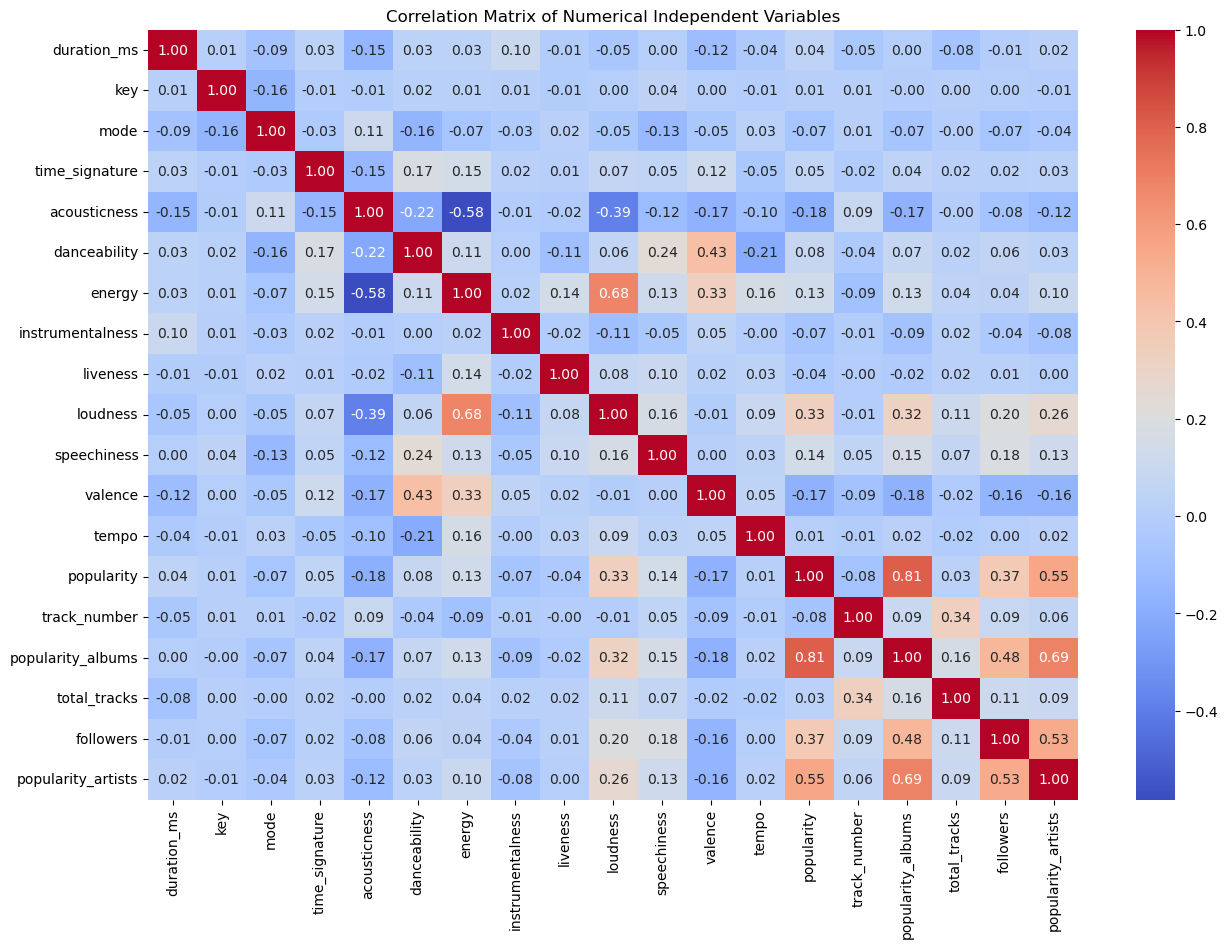

In [118]:
import seaborn as sns
import matplotlib.pyplot as plt

# basic statistics
display(df5.describe())

# Plotting distributions of numerical features
numerical_data.hist(bins=30, figsize=(15, 10))
plt.tight_layout()
plt.show()

# Correlation matrix
corr_matrix = numerical_data.corr()
plt.figure(figsize=(15, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Numerical Independent Variables')
plt.show()

### Which Artist Has the Highest Average Popularity and Followers?

In [119]:

# Grouping by artist_id and calculating the mean popularity for each artist
artist_popularity = df5.groupby('artist_id')['popularity'].mean().reset_index()

# Merging artist popularity with the artists df for artist names
artist_popularity = artist_popularity.merge(artists[['artist_id', 'name']], on='artist_id')

# Sort artists by popularity
artist_popularity = artist_popularity.sort_values(by='popularity', ascending=False)

# Displaying the top 10 artists with similar popularity
artist_popularity.head(15)

,artist_id,popularity,name
1707,4lDBihdpMlOalxy1jkUbPl,83.0,Grey
1542,4IWBUUAFIplrNtaOHcJPRM,82.0,James Arthur
2406,6qqNVTkY8uBg9cP3Jd7DAH,82.0,Billie Eilish
882,2RDOrhPqAM4jzTRCEb19qX,81.0,Sheck Wes
2236,6M2wZ9GZgrQXHCFfjv46we,81.0,Dua Lipa
2132,64M6ah0SkkRsnPGtGiRAbb,80.0,Bebe Rexha
2591,7Ln80lUS6He07XvHI8qqHH,80.0,Arctic Monkeys
1534,4GvEc3ANtPPjt1ZJllr5Zl,80.0,Bazzi
2455,6ydoSd3N2mwgwBHtF6K7eX,80.0,Calum Scott
2540,7CajNmpbOovFoOoasH2HaY,79.0,Calvin Harris


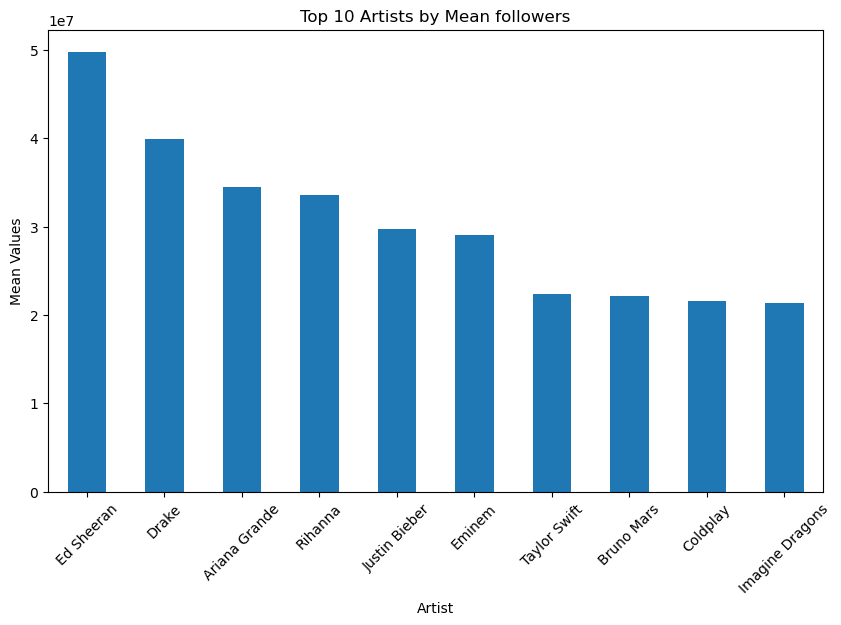

In [120]:
# Grouping by artist and calculating the mean popularity and followers
artist_popularity_followers = df5.groupby('name_artists')['followers'].mean()

# Sorting by popularity in descending order and selecting the top 10 artists
top_10_artists = artist_popularity_followers.sort_values(ascending=False).head(10)

# Plotting
plt.figure(figsize=(10, 6))
top_10_artists.plot(kind='bar', ax=plt.gca())
plt.title('Top 10 Artists by Mean followers')
plt.xlabel('Artist')
plt.ylabel('Mean Values')
plt.xticks(rotation=45)
plt.show()

Text(0.5, 1.0, 'Count of Artist Types in the data')

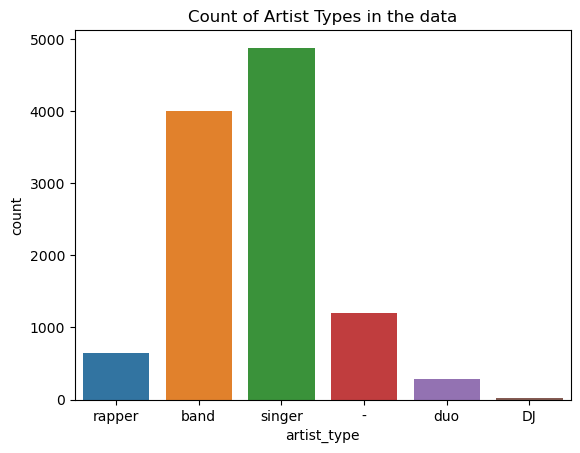

In [121]:
sns.countplot(data=df5, x='artist_type')
plt.title('Count of Artist Types in the data')

In [122]:
df5[['album_type','song_type']].dtypes

album_type    object
song_type     object
dtype: object

## Whict type of song had the highest or lowest album, artist and explicit condition?

In [123]:
obj=df5[['song_type','album_type','explicit','artist_type']]

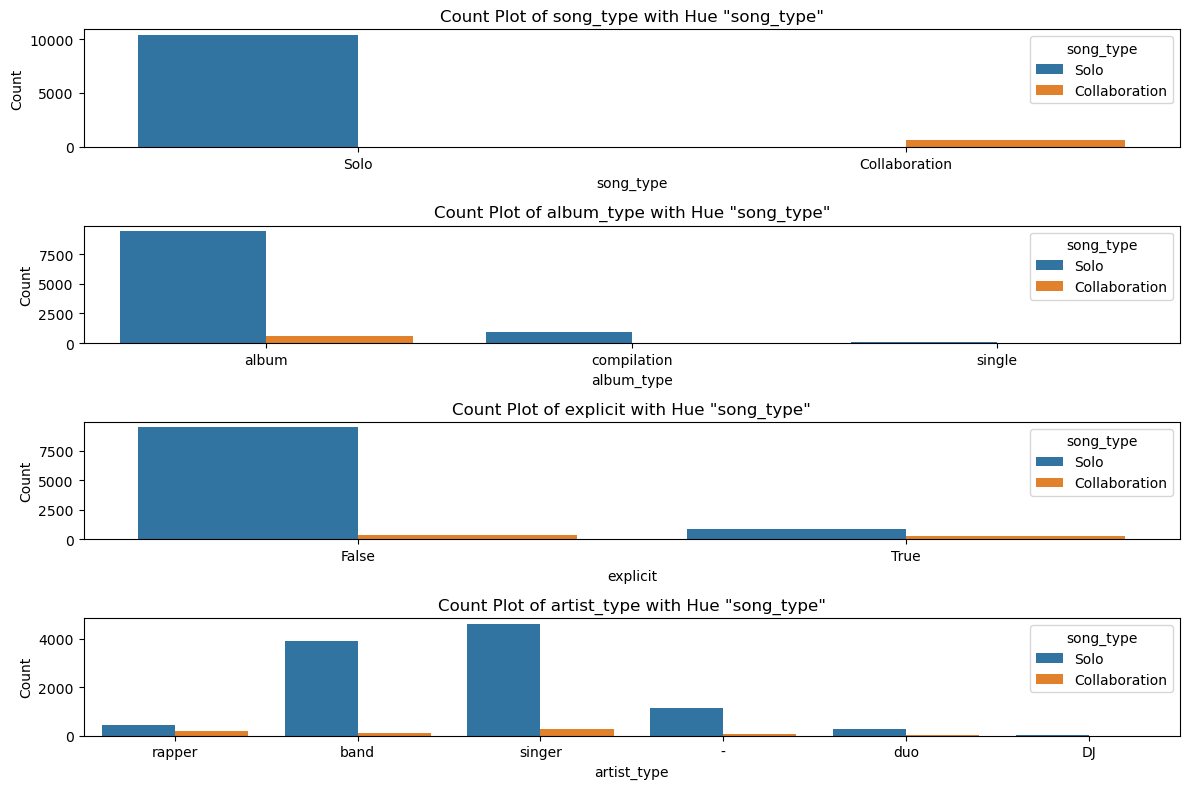

In [124]:
# Columns to plot
columns = ['song_type', 'album_type', 'explicit', 'artist_type']

# Plotting
plt.figure(figsize=(12, 8))

for i, col in enumerate(columns, start=1):
    plt.subplot(len(columns), 1, i)
    sns.countplot(data=obj, x=col, hue='song_type')
    plt.title(f'Count Plot of {col} with Hue "song_type"')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.legend(title='song_type', loc='upper right')

plt.tight_layout()
plt.show()

In [125]:
dropcol = ['artists_albums', 'artists', 'billboard','billboard_albums' , 'release_date_precision', 'release_date', 'track_number', 'release_date_precision_releases', 'release_date_releases']

df5.drop(dropcol, axis=1, inplace=True)

In [126]:
categ_cols = [col for col in df5 if df5[col].dtype == 'object']
num_cols = [col for col in df5 if df5[col].dtype != 'object']
print(f"Category Columns are: {categ_cols}")
print(f"Numeric Columns are: {num_cols}")

Category Columns are: ['lyrics', 'song_name', 'song_type', 'name', 'album_type', 'artist_id', 'name_artists', 'artist_type', 'main_genre']
Numeric Columns are: ['duration_ms', 'key', 'mode', 'time_signature', 'acousticness', 'danceability', 'energy', 'instrumentalness', 'liveness', 'loudness', 'speechiness', 'valence', 'tempo', 'popularity', 'explicit', 'popularity_albums', 'total_tracks', 'followers', 'popularity_artists']


In [127]:
categ= ['album_type', 'artist_type', 'song_type', 'main_genre', 'explicit']

df5[categ] = df5[categ].astype('category')

In [128]:
df5[categ_cols].sample(10)

,lyrics,song_name,song_type,name,album_type,artist_id,name_artists,artist_type,main_genre
9190,"[""[Chorus]\nBaby don't you try to look in my m...","Baby, Don't Be Looking in My Mind",Solo,The Chokin' Kind,album,5HRSYURV6LFFRCjAtiK0py,Joe Simon,singer,classic soul
6425,['I flip the switch on my laser video\nAnd the...,High Time,Solo,Kilroy Was Here,album,4salDzkGmfycRqNUbyBphh,Styx,band,album rock
3049,"[""[Intro]\nDon't look at me\n\n[Verse 1]\nEver...",Beautiful,Solo,Stripped,album,1l7ZsJRRS8wlW3WfJfPfNS,Christina Aguilera,singer,dance pop
350,['[Intro]\nNess on the beat\nWhat the fuck I\'...,Say A',Solo,The Bigger Artist,album,31W5EY0aAly4Qieq6OFu6I,A Boogie Wit da Hoodie,singer,rap
7991,"[""Well, a-here-ee-yup, a-here-ee-yup, a-here w...",Rockin' All Over The World,Solo,The Long Road Home - In Concert,album,5ujCegv1BRbEPTCwQqFk6t,John Fogerty,band,blues-rock
341,"[""[Verse 1]\nAll the pretty girls said pick me...",All the Pretty Girls,Solo,Cosmic Hallelujah,album,3grHWM9bx2E9vwJCdlRv9O,Kenny Chesney,singer,contemporary country
4511,"[""[Verse 1]\nShe knows every move that a man c...",Alibis,Solo,Alibis,album,2BQVRw9md4UKcGUrDXABCD,Tracy Lawrence,singer,arkansas country
9010,"[""We've been together for so long\nListen baby...",Trying to Make a Fool of Me,Solo,The Delfonics,album,6YPRXu1dazGYcSZv4HJEH4,The Delfonics,band,classic soul
3317,"[""[Verse 1: Beyoncé]\nNow that you're out of m...",Survivor,Solo,Survivor,album,1Y8cdNmUJH7yBTd9yOvr5i,Destiny's Child,band,dance pop
4695,"[""I've been around for quite some time\nPatien...",I'm The One You Need,Solo,Affairs Of The Heart,album,71aKjsWKYqASAffyIQaocZ,Jody Watley,singer,disco


In [129]:
df5[categ_cols].nunique()

lyrics          10866
song_name       10162
song_type           2
name             5992
album_type          3
artist_id        2745
name_artists     2744
artist_type         6
main_genre        299
dtype: int64

In [130]:
df5['main_genre'].value_counts()

main_genre
album rock              1580
dance pop               1202
contemporary country     956
adult standards          878
classic soul             445
                        ... 
native american            1
german pop                 1
celtic                     1
ballroom                   1
classic soundtrack         1
Name: count, Length: 299, dtype: int64

In [131]:
df5.nunique()

duration_ms            7855
key                      12
mode                      2
time_signature            5
acousticness           2636
danceability            787
energy                  883
instrumentalness       3287
liveness               1426
loudness               7361
speechiness            1113
valence                 991
tempo                 10144
lyrics                10866
song_name             10162
popularity               87
explicit                  2
song_type                 2
name                   5992
popularity_albums        95
total_tracks             75
album_type                3
artist_id              2745
name_artists           2744
followers              2725
popularity_artists       99
artist_type               6
main_genre              299
dtype: int64

In [132]:
categ

['album_type', 'artist_type', 'song_type', 'main_genre', 'explicit']

In [133]:
le = OneHotEncoder(sparse_output=False)

oh_col = le.fit_transform(df5[categ])


In [134]:
oh_col = pd.DataFrame(oh_col)
oh_col.columns  = list(le.get_feature_names_out())

In [135]:
df5.reset_index(inplace=True,drop=True)

In [136]:
assert df5.index.equals(oh_col.index)

In [137]:
df5 = pd.concat([df5,oh_col], axis=1)
df5.columns

Index(['duration_ms', 'key', 'mode', 'time_signature', 'acousticness',
       'danceability', 'energy', 'instrumentalness', 'liveness', 'loudness',
       ...
       'main_genre_swamp pop', 'main_genre_talent show',
       'main_genre_traditional country', 'main_genre_trap music',
       'main_genre_turntablism', 'main_genre_urban contemporary',
       'main_genre_west coast rap', 'main_genre_yacht rock', 'explicit_0.0',
       'explicit_1.0'],
      dtype='object', length=340)

In [ ]:
df5.drop(categ,axis=1,inplace=True)

In [139]:
df5.rename(columns={'name': 'album_name'}, inplace=True)

In [140]:
dropa =['name_artists', 'album_name', 'lyrics', 'song_name']


In [142]:
def clean_title(title):
    title = re.sub("[^a-z A-Z 0-9 ]", "", title)
    return title

df5['name_artists'] = df5['name_artists'].swifter.apply(clean_title)

Pandas Apply:   0%|          | 0/11040 [00:00<?, ?it/s]

In [169]:
df6= df5.copy()

In [170]:
dropy =[ 'album_name', 'lyrics', 'song_name', 'name_artists']
df6.drop(dropy,axis=1,inplace=True)

In [171]:
df6 = df6.groupby('artist_id').mean()#.reset_index()#.agg(mean)

##  Silhoette Score
The Silhouette Coefficient is calculated using the mean intra-cluster distance (a) and the mean nearest-cluster distance (b) for each sample. The Silhouette Coefficient for a sample is (b - a) / max(a, b). To clarify, b is the distance between a sample and the nearest cluster that the sample is not a part of. Note that Silhouette Coefficient is only defined if number of labels is 2 <= n_labels <= n_samples - 1.

This function returns the mean Silhouette Coefficient over all samples. To obtain the values for each sample, use silhouette_samples.

The best value is 1 and the worst value is -1. Values near 0 indicate overlapping clusters. Negative values generally indicate that a sample has been assigned to the wrong cluster, as a different cluster is more similar.

## Davies-Bouldin Index Score
The score is defined as the average similarity measure of each cluster with its most similar cluster, where similarity is the ratio of within-cluster distances to between-cluster distances. Thus, clusters which are farther apart and less dispersed will result in a better score.
The minimum score is zero, with lower values indicating better clustering.



In [172]:

X_train,X_test = train_test_split(df6,test_size=0.25)

In [173]:
kmeans = KMeans(n_clusters=5, random_state=42, n_init="auto")
kmeans.fit(X_train)

labels = kmeans.predict(X_test)
sscore = silhouette_score(X_test, labels)
dscore = davies_bouldin_score(X_test, labels)

print(f"Silhoette Score is: {sscore}")
print(f"Davies-Bouldin Index Score is: {dscore}")


Silhoette Score is: 0.7838473322690367
Davies-Bouldin Index Score is: 0.42273812176583764


In [225]:
kmeanss = KMeans(n_clusters=5, random_state=42, n_init="auto")


labelss = kmeans.fit_predict(df6)
labelss

array([3, 8, 0, ..., 0, 0, 0])

In [233]:
len(labelss)

2745

In [238]:
cluster_df = pd.DataFrame({'artist_id':df6.index, 'labels':labelss})
cluster_df['labels'].value_counts()

labels
0    1992
8     408
4     171
7      74
3      54
1      23
5      17
2       4
6       1
9       1
Name: count, dtype: int64

In [174]:
class elbowMethod():
    def __init__(self, sparseMatrix):
        self.sparseMatrix = sparseMatrix
        self.wcss = list()
        self.differences = list()
    def run(self, init, upto, max_iterations = 300):
        for i in tqdm(range(init, upto + 1)):
            kmeans = KMeans(n_clusters=i, init = 'k-means++', max_iter = max_iterations, n_init = 10, random_state = 0)
            kmeans.fit(self.sparseMatrix)
            self.wcss.append(kmeans.inertia_)
        self.differences = list()
        for i in range(len(self.wcss)-1):
            self.differences.append(self.wcss[i] - self.wcss[i+1])
    def showPlot(self, boundary = 500, upto_cluster = None):
        if upto_cluster is None:
            WCSS = self.wcss
            DIFF = self.differences
        else:
            WCSS = self.wcss[:upto_cluster]
            DIFF = self.differences[:upto_cluster - 1]
        plt.figure(figsize=(15, 6))
        plt.subplot(121).set_title('Elbow Method Graph')
        plt.plot(range(1, len(WCSS) + 1), WCSS)
        plt.grid(True)
        plt.subplot(122).set_title('Differences in Each Two Consective Clusters')
        len_differences = len(DIFF)
        X_differences = range(1, len_differences + 1)
        plt.plot(X_differences, DIFF)
        plt.plot(X_differences, np.ones(len_differences)*boundary, 'r')
        plt.plot(X_differences, np.ones(len_differences)*(-boundary), 'r')
        plt.grid()
        plt.show()
        

100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:08<00:00,  1.24it/s]


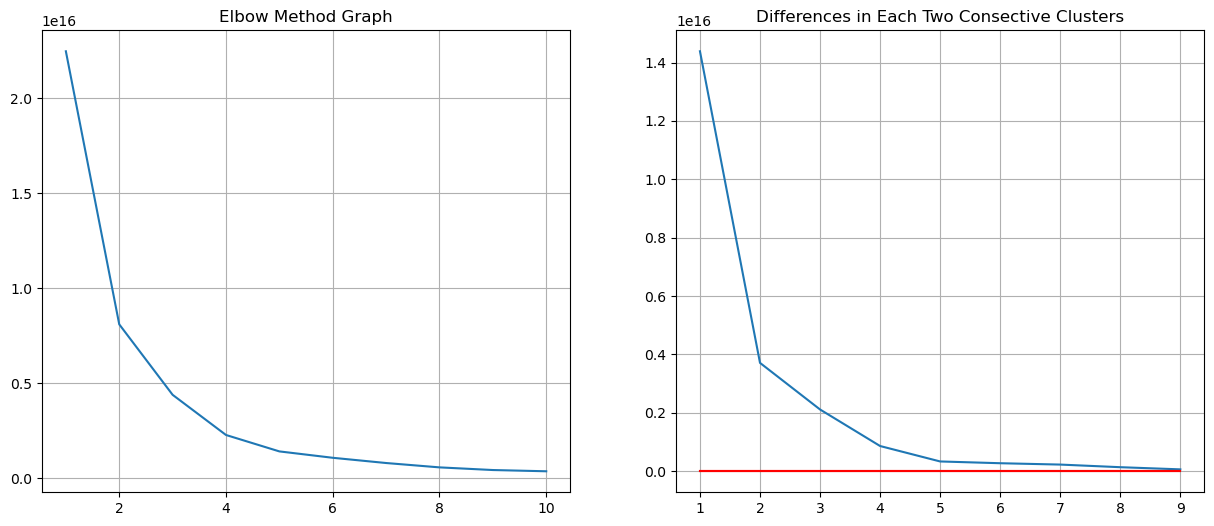

In [175]:

elbow_method = elbowMethod(sparseMatrix=df6)
elbow_method.run(1, 10)

elbow_method.showPlot(boundary = 10)


n_clusters = 2: Silhouette Score = 0.8985869125597937, Davies-Bouldin Index = 0.34602599567421205
n_clusters = 3: Silhouette Score = 0.8423807473686655, Davies-Bouldin Index = 0.40767132266607775
n_clusters = 4: Silhouette Score = 0.8341344058991387, Davies-Bouldin Index = 0.42980099949961775
n_clusters = 5: Silhouette Score = 0.7838473322690367, Davies-Bouldin Index = 0.42273812176583764
n_clusters = 6: Silhouette Score = 0.7838473322690367, Davies-Bouldin Index = 0.42273812176583764
n_clusters = 7: Silhouette Score = 0.7180289145224001, Davies-Bouldin Index = 0.41003939957387675
n_clusters = 8: Silhouette Score = 0.7133748675552388, Davies-Bouldin Index = 0.4842042415640155
n_clusters = 9: Silhouette Score = 0.7141102945380607, Davies-Bouldin Index = 0.42004004642983384
n_clusters = 10: Silhouette Score = 0.7021198478693848, Davies-Bouldin Index = 0.45402127029713596


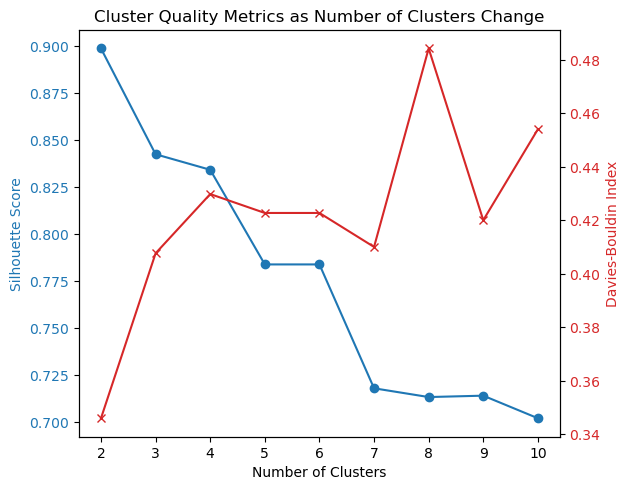

In [176]:


# Assuming X_train is your training set and X_test is your test set

silhouette_scores = []
davies_bouldin_scores = []

# Try different numbers of clusters
for n_clusters in range(2, 11):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init="auto")
    kmeans.fit(X_train)
    
    # Predict the cluster labels for the test set
    labels = kmeans.predict(X_test)
    
    # Calculate the silhouette score and Davies-Bouldin index
    sscore = silhouette_score(X_test, labels)
    dscore = davies_bouldin_score(X_test, labels)
    
    # Store the scores
    silhouette_scores.append(sscore)
    davies_bouldin_scores.append(dscore)
    
    print(f"n_clusters = {n_clusters}: Silhouette Score = {sscore}, Davies-Bouldin Index = {dscore}")

# Plotting the scores
fig, ax1 = plt.subplots()

color = 'tab:blue'
ax1.set_xlabel('Number of Clusters')
ax1.set_ylabel('Silhouette Score', color=color)
ax1.plot(range(2, 11), silhouette_scores, marker='o', color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:red'
ax2.set_ylabel('Davies-Bouldin Index', color=color)  # we already handled the x-label with ax1
ax2.plot(range(2, 11), davies_bouldin_scores, marker='x', color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.title('Cluster Quality Metrics as Number of Clusters Change')
plt.show()


In [177]:
df6

,duration_ms,key,mode,time_signature,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,valence,tempo,popularity,popularity_albums,total_tracks,followers,popularity_artists,album_type_album,album_type_compilation,album_type_single,artist_type_-,artist_type_DJ,artist_type_band,artist_type_duo,artist_type_rapper,artist_type_singer,song_type_Collaboration,song_type_Solo,main_genre_-,main_genre_a cappella,main_genre_acid house,main_genre_acid jazz,main_genre_acoustic pop,main_genre_adult standards,main_genre_afrobeat,main_genre_alabama indie,main_genre_alabama metal,main_genre_alaska indie,main_genre_alberta country,main_genre_album rock,main_genre_albuquerque indie,main_genre_alternative country,main_genre_alternative dance,main_genre_alternative hip hop,main_genre_alternative metal,main_genre_alternative pop,main_genre_alternative pop rock,main_genre_alternative r&b,main_genre_alternative rock,main_genre_american folk revival,main_genre_anarcho-punk,main_genre_anthem worship,main_genre_antiviral pop,main_genre_arkansas country,main_genre_art pop,main_genre_art rock,main_genre_atl hip hop,main_genre_audiophile vocal,main_genre_australian alternative rock,main_genre_australian country,main_genre_australian dance,main_genre_australian hip hop,main_genre_australian indie,main_genre_australian pop,main_genre_australian rock,main_genre_bachata,main_genre_bagpipe,main_genre_ballroom,main_genre_baroque pop,main_genre_bassline,main_genre_baton rouge rap,main_genre_battle rap,main_genre_bboy,main_genre_beach music,main_genre_bebop,main_genre_big beat,main_genre_big room,main_genre_bluegrass,main_genre_blues,main_genre_blues-rock,main_genre_bolero,main_genre_bossa nova,main_genre_boston rock,main_genre_bounce,main_genre_bow pop,main_genre_boy band,main_genre_brill building pop,main_genre_brit funk,main_genre_british blues,main_genre_british folk,main_genre_british invasion,main_genre_british soul,main_genre_britpop,main_genre_broadway,main_genre_brooklyn indie,main_genre_brostep,main_genre_bubblegum dance,main_genre_bubblegum pop,main_genre_cali rap,main_genre_canadian ccm,main_genre_canadian celtic,main_genre_canadian contemporary r&b,main_genre_canadian country,main_genre_canadian folk,main_genre_canadian hip hop,main_genre_canadian indie,main_genre_canadian latin,main_genre_canadian pop,main_genre_canadian pop punk,main_genre_canadian rock,main_genre_canadian singer-songwriter,main_genre_candy pop,main_genre_ccm,main_genre_celtic,main_genre_celtic rock,main_genre_chamber pop,main_genre_chicago drill,main_genre_chicago rap,main_genre_chicago soul,main_genre_chicano rap,main_genre_christian alternative rock,main_genre_classic canadian rock,main_genre_classic garage rock,main_genre_classic girl group,main_genre_classic norwegian pop,main_genre_classic rock,main_genre_classic russian rock,main_genre_classic soul,main_genre_classic soundtrack,main_genre_classic swedish pop,main_genre_classic uk pop,main_genre_clean comedy,main_genre_colombian pop,main_genre_comedy,main_genre_comic,main_genre_comic metal,main_genre_conscious hip hop,main_genre_contemporary country,main_genre_cool jazz,main_genre_cosmic american,main_genre_country,main_genre_country dawn,main_genre_country gospel,main_genre_country road,main_genre_country rock,main_genre_cowpunk,main_genre_crunk,main_genre_cumbia,main_genre_cyberpunk,main_genre_dance pop,main_genre_dance rock,main_genre_dancehall,main_genre_danish pop,main_genre_deep adult standards,main_genre_deep contemporary country,main_genre_deep disco,main_genre_deep east coast hip hop,main_genre_deep melodic hard rock,main_genre_deep new wave,main_genre_deep pop r&b,main_genre_deep soft rock,main_genre_deep southern trap,main_genre_detroit hip hop,main_genre_detroit house,main_genre_dfw rap,main_genre_dirty south rap,main_genre_disco,main_genre_disco house,main_genre_disney,main_genre_diva house,main_genre_dixieland,main_genre_downtempo,main_genre_dutch indie,main_genre_dutch rock,main_genre

In [214]:
vectorizer = TfidfVectorizer(analyzer='char',ngram_range=(1, 2),min_df=1, stop_words='english')

tfidf = vectorizer.fit_transform(df5["name_artists"])

In [215]:
similarity = cosine_similarity(tfidf[1], tfidf).flatten()
similarity

array([0.36478071, 1.        , 0.12831004, ..., 0.34484359, 0.30607914,
       0.27356775])

In [216]:
def search(title):
    title = clean_title(title)
    query_vec = vectorizer.transform([title])
    similarity = cosine_similarity(query_vec, tfidf).flatten()
    indices = np.argpartition(similarity, -5)[-5:]
    results = df5.iloc[indices].iloc[::-1]
    
    return results

In [217]:
search('na gr')

,duration_ms,key,mode,time_signature,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,valence,tempo,lyrics,song_name,popularity,album_name,popularity_albums,total_tracks,artist_id,name_artists,followers,popularity_artists,album_type_album,album_type_compilation,album_type_single,artist_type_-,artist_type_DJ,artist_type_band,artist_type_duo,artist_type_rapper,artist_type_singer,song_type_Collaboration,song_type_Solo,main_genre_-,main_genre_a cappella,main_genre_acid house,main_genre_acid jazz,main_genre_acoustic pop,main_genre_adult standards,main_genre_afrobeat,main_genre_alabama indie,main_genre_alabama metal,main_genre_alaska indie,main_genre_alberta country,main_genre_album rock,main_genre_albuquerque indie,main_genre_alternative country,main_genre_alternative dance,main_genre_alternative hip hop,main_genre_alternative metal,main_genre_alternative pop,main_genre_alternative pop rock,main_genre_alternative r&b,main_genre_alternative rock,main_genre_american folk revival,main_genre_anarcho-punk,main_genre_anthem worship,main_genre_antiviral pop,main_genre_arkansas country,main_genre_art pop,main_genre_art rock,main_genre_atl hip hop,main_genre_audiophile vocal,main_genre_australian alternative rock,main_genre_australian country,main_genre_australian dance,main_genre_australian hip hop,main_genre_australian indie,main_genre_australian pop,main_genre_australian rock,main_genre_bachata,main_genre_bagpipe,main_genre_ballroom,main_genre_baroque pop,main_genre_bassline,main_genre_baton rouge rap,main_genre_battle rap,main_genre_bboy,main_genre_beach music,main_genre_bebop,main_genre_big beat,main_genre_big room,main_genre_bluegrass,main_genre_blues,main_genre_blues-rock,main_genre_bolero,main_genre_bossa nova,main_genre_boston rock,main_genre_bounce,main_genre_bow pop,main_genre_boy band,main_genre_brill building pop,main_genre_brit funk,main_genre_british blues,main_genre_british folk,main_genre_british invasion,main_genre_british soul,main_genre_britpop,main_genre_broadway,main_genre_brooklyn indie,main_genre_brostep,main_genre_bubblegum dance,main_genre_bubblegum pop,main_genre_cali rap,main_genre_canadian ccm,main_genre_canadian celtic,main_genre_canadian contemporary r&b,main_genre_canadian country,main_genre_canadian folk,main_genre_canadian hip hop,main_genre_canadian indie,main_genre_canadian latin,main_genre_canadian pop,main_genre_canadian pop punk,main_genre_canadian rock,main_genre_canadian singer-songwriter,main_genre_candy pop,main_genre_ccm,main_genre_celtic,main_genre_celtic rock,main_genre_chamber pop,main_genre_chicago drill,main_genre_chicago rap,main_genre_chicago soul,main_genre_chicano rap,main_genre_christian alternative rock,main_genre_classic canadian rock,main_genre_classic garage rock,main_genre_classic girl group,main_genre_classic norwegian pop,main_genre_classic rock,main_genre_classic russian rock,main_genre_classic soul,main_genre_classic soundtrack,main_genre_classic swedish pop,main_genre_classic uk pop,main_genre_clean comedy,main_genre_colombian pop,main_genre_comedy,main_genre_comic,main_genre_comic metal,main_genre_conscious hip hop,main_genre_contemporary country,main_genre_cool jazz,main_genre_cosmic american,main_genre_country,main_genre_country dawn,main_genre_country gospel,main_genre_country road,main_genre_country rock,main_genre_cowpunk,main_genre_crunk,main_genre_cumbia,main_genre_cyberpunk,main_genre_dance pop,main_genre_dance rock,main_genre_dancehall,main_genre_danish pop,main_genre_deep adult standards,main_genre_deep contemporary country,main_genre_deep disco,main_genre_deep east coast hip hop,main_genre_deep melodic hard rock,main_genre_deep new wave,main_genre_deep pop r&b,main_genre_deep soft rock,main_genre_deep southern trap,main_genre_detroit hip hop,main_genre_detroit house,main_genre_dfw rap,main_genre_dirty south rap,main_genre_disco,main_genre_disco house,main_genre_disney,main_genre_diva house,main_genre_dixieland,main_genre_downtempo,main

In [218]:
import ipywidgets as widgets
from IPython.display import display

artist_input = widgets.Text(
    value='Ariana Grande',
    description='Artist Name',
    disabled=False
)
artist_list = widgets.Output()

def on_type(data):
    with artist_list:
        artist_list.clear_output()
        title = data["new"]
        if len(title) > 5:
            display(search(title))

artist_input.observe(on_type, names='value')


display(artist_input, artist_list)

Text(value='Ariana Grande', description='Artist Name')

Output()

In [222]:
df5[df5['name_artists'] == 'Ariana Grande']['artist_id'].unique()[0]

'66CXWjxzNUsdJxJ2JdwvnR'

In [223]:
def get_id(artist_name):
    id = df5[df5['name_artists'] == 'Ariana Grande']['artist_id'].unique()[0]
    
    return id
    
    
    
get_id('Ariana Grande')


'66CXWjxzNUsdJxJ2JdwvnR'

In [250]:
df6.index

Index(['00FQb4jTyendYWaN8pK0wa', '00tVTdpEhQQw1bqdu8RCx2',
       '01Ppu7N8uYJI8SAONo2YZA', '01QTIT5P1pFP3QnnFSdsJf',
       '01Wck2m10xhdxUrLaMq60y', '01WjpKiWVNurV5hjIadB8C',
       '01hRNr3yF5bYnPq4wZ88iI', '01lz5VBfkMFDteSA9pKJuP',
       '021hNAnkFIbyFyL97br6NB', '02NfyD6AlLA12crYzw5YcR',
       ...
       '7y9COUDxusQXRjW95vOubE', '7yk35uHNQclPXFGFoTU44w',
       '7ypgj95aGInvJMJbMv78wB', '7z5WFjZAIYejWy0NI5lv4T',
       '7zICaxnDB9ZprDSiFpvbbW', '7zOcRYg1BYXpwr71XTWNr7',
       '7zYGAXxAaq15C9eM29M8Fj', '7zeHJIIfNStVfxlbT72UwY',
       '7zfhej6FnVXN9LIXs6dcoK', '7zgtJuRm0JcJpPQRjCgXT7'],
      dtype='object', name='artist_id', length=2745)

In [275]:
cluster_no = cluster_df.loc[cluster_df['artist_id'] == get_id('Ariana Grande')]['labels'].item()
cluster_ids= cluster_df[cluster_df['labels']==cluster_no]['artist_id']

similar_artists = artists[artists['artist_id'].isin(cluster_ids)][['name','image_url', 'popularity']].sort_values('popularity',ascending=False)

,name,image_url,popularity
0,Ariana Grande,https://i.scdn.co/image/b1dfbe843b0b9f54ab2e58...,96
116,Eminem,https://i.scdn.co/image/60c4daa4721f666c6afaee...,94
131,Justin Bieber,https://i.scdn.co/image/5c3cf2ee3494e2da71dcf2...,94
309,Rihanna,https://i.scdn.co/image/1fc2f537d678d701d7d143...,91


In [289]:
def find_similar_artists(artist_name):
    artist_id = df5[df5['name_artists'] == artist_name]['artist_id'].unique()[0]
    #cluster_no = cluster_df.loc[cluster_df['artist_id'] == artist_id]['labels'].item()
    cluster_no = cluster_df.loc[cluster_df['artist_id'] == artist_id]['labels'].item()
    cluster_ids= cluster_df[cluster_df['labels']==cluster_no]['artist_id']

    similar_artists = artists[artists['artist_id'].isin(cluster_ids)][['name','image_url', 'popularity']].sort_values('popularity',ascending=False)
    
    
    return similar_artists




In [290]:
find_similar_artists("Ariana Grande")

,name,image_url,popularity
0,Ariana Grande,https://i.scdn.co/image/b1dfbe843b0b9f54ab2e58...,96
116,Eminem,https://i.scdn.co/image/60c4daa4721f666c6afaee...,94
131,Justin Bieber,https://i.scdn.co/image/5c3cf2ee3494e2da71dcf2...,94
309,Rihanna,https://i.scdn.co/image/1fc2f537d678d701d7d143...,91


In [294]:
search('Ariana')['name_artists'].iloc[0]

'Ariana Grande'

In [295]:
artist_name_input = widgets.Text(
    value='Ariana Grande',
    description='Artist Name:',
    disabled=False
)
recommendation_list = widgets.Output()

def on_type(data):
    with recommendation_list:
        recommendation_list.clear_output()
        title = data["new"]
        if len(title) > 5:
            results = search(title)
            display(find_similar_artists(results['name_artists'].iloc[0]))

artist_name_input.observe(on_type, names='value')

display(artist_name_input, recommendation_list)

Text(value='Ariana Grande', description='Artist Name:')

Output()

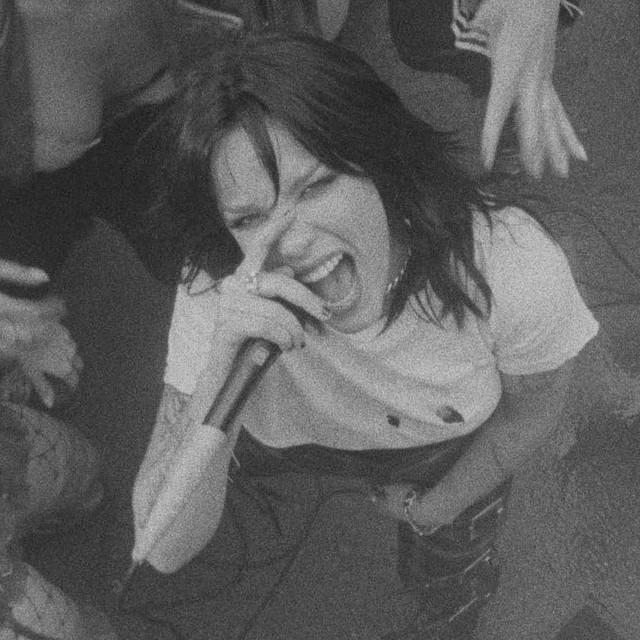

In [279]:
import requests
from PIL import Image
from urllib.request import urlopen

url='https://i.scdn.co/image/22a5f3d8c42bc7cb55215eb1627e429f54ed0998'
img=Image.open(urlopen(url))

display(img)#.show()